# Redução de Dimensionalidade

- [Métodos de Redução da Dimensionalidade](https://rpubs.com/Saskia/520216)
- [Kernel PCA](https://rpubs.com/markloessi/505868)
- [LDA EX1](https://rpubs.com/cyobero/lda)
- [LDA EX2](https://www.rpubs.com/dvallslanaquera/lda)
- [PCA](https://rpubs.com/JanpuHou/278584)

# Bibliotecas

In [36]:
# Treino-Teste
library(caTools)
# Primeira opção do PCA
library(caret)
# Segunda Opção do PCA
library(stats)
# LDA
library(MASS)
# TSne
library(Rtsne)
library(irlba)
# naivebays
library(e1071)

# Base da dados - Iris

- Precisam de dados escalonados

In [3]:
df = iris
df[, 1:4] = scale(df[, 1:4])
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


# Divisao em Treino e Teste

In [4]:
set.seed(5)
divisao <- sample.split(df$Species, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

# Classificação Sem Redução da Dimensionalidade

In [5]:
classificador <- naiveBayes(x = treino[, -5], y = treino[, 5])

previsao = predict(classificador, newdata = teste[, -5], type = 'class')

acuracia = 100 * sum(previsao == teste[, 5])/length(teste[, 5])
acuracia

[1] 94.44444

## PCA - Library Caret

- O método preProcess possui um método embutido que permite calcular o PCA

Parâmetros

- **X** - Uma matriz ou quadro de dados. Preditores não numéricos são permitidos, mas serão ignorados.
- **method** - Um vetor de caractere especificando o tipo de processamento. Os valores possíveis são "BoxCox", "YeoJohnson", "expoTrans", "center", "scale", "range", "knnImpute", "bagImpute", "mediaimputo", "pca", "ica", "spatialSign", "corr", "zv", "nzv" e "conditionalX"
- **thresh** - Um corte para que a porcentagem cumulativa de variância seja mantida pelo PCA
- **pcaComp** - O número específico de componentes PCA para manter. Se especificado, este over-rides thresh
- **na.remove** - Uma lógica; os valores perdidos devem ser removidos dos cálculos?
- **K** - O número de vizinhos mais próximos do conjunto de treinamento para usar para imputação
- **knnSummary** - Função para média dos valores do vizinho por coluna durante a imputação
- **outcome** - Um vetor numérico ou fator para os resultados do conjunto de treinamento. Isso pode ser usado para ajudar a estimar a transformação Box-Cox das variáveis preditoras. 
- **fudge** - Um valor de tolerância: Os valores lambda de transformação box-cox dentro de +/-fudge serão coagidos a 0 e dentro de 1+/-fudge serão coagidos a 1.
- **numUnique** - Quantos valores únicos devem ter para estimar a transformação Box-Cox?y
- **verbose** - Uma lógica: imprime um tronco à medida que os cálculos prosseguem
- **freqCut** - O corte para a razão do valor mais comum para o segundo valor mais comum. ver.nearZeroVar
- **uniqueCut** - O corte para a porcentagem de valores distintos do número de amostras totais. ver.nearZeroVar
- **cut** - Um valor numérico para o corte de correlação absoluta par-wise. ver.findCorrelation
- **rangeBounds** - Um vetor numérico de dois elementos especificando intervalo fechado para transformação de alcance
- **object** -Um objeto de classe preProcess
- **newData** - Uma matriz ou quadro de dados de novos dados a serem pré-processados

Atributos

- preProcess resulta em uma lista com elementos
- **call** - a chamada de função
- **method** - Uma lista nomeada de operações e as variáveis utilizadas para cada
- **dim** - As dimensões de x
- **bc** - Valores de transformação de Box-Cox
- **mean** - Um vetor de meios (se o centro foi solicitado)
- **DST** - Um vetor de desvios padrão (se o dimensionamento ou PCA foi solicitado)
- **rotation** - Uma matriz de eigenvectors se pca foi solicitado
- **method** - O valor de method
- **thresh** - O valor de thresh
- **ranges** - Uma matriz de valores mínimos e máximos para cada preditor quando inclui "alcance" (e de outra forma)methodNULL
- **numComp** - O número de componentes principais necessários para capturar a quantidade especificada de variância
- **Ica** - Contém valores para a e matriz da decomposiçãoWK
- **median** - Um vetor de medianas (se a imputação mediana foi solicitada)
- **predict.preProcess** produzirá um quadro de dados

In [6]:
pca = preProcess(treino, method = 'pca')
pca

Created from 114 samples and 5 variables

Pre-processing:
  - centered (4)
  - ignored (1)
  - principal component signal extraction (4)
  - scaled (4)

PCA needed 2 components to capture 95 percent of the variance

## Aplicando PCA nos Dados

In [7]:
pca_treino = predict(pca, treino)
pca_teste = predict(pca, teste)
head(pca_treino)

,Species,PC1,PC2
1,setosa,-2.214765,-0.50748259
2,setosa,-2.069790,0.61438382
4,setosa,-2.278131,0.54213579
5,setosa,-2.331130,-0.66915996
6,setosa,-1.995743,-1.47953391
7,setosa,-2.398283,-0.08283519


## Classificar Usando PCA

In [8]:
classificador <- naiveBayes(x = pca_treino[, -1], y = pca_treino[, 1])

previsao = predict(classificador, newdata = pca_teste, type = 'class')

acuracia = 100 * sum(previsao == pca_teste[, 1])/length(pca_teste[, 1])
acuracia

[1] 83.33333

## Aumentando o Thresh (Corte)

In [9]:
pca_threshed = preProcess(treino, method = 'pca', thresh = .98)
pca_threshed 

Created from 114 samples and 5 variables

Pre-processing:
  - centered (4)
  - ignored (1)
  - principal component signal extraction (4)
  - scaled (4)

PCA needed 3 components to capture 98 percent of the variance

In [10]:
pca_treino = predict(pca_threshed, treino)
pca_teste = predict(pca_threshed, teste)

classificador <- naiveBayes(x = pca_treino[, -1], y = pca_treino[, 1])

previsao = predict(classificador, newdata = pca_teste, type = 'class')

acuracia = 100 * sum(previsao == pca_teste[, 1])/length(pca_teste[, 1])
acuracia

[1] 91.66667

## Especifidando o Número de Entradas

In [11]:
pca_comp = preProcess(treino, method = 'pca', pcaComp = 4)
pca_comp

Created from 114 samples and 5 variables

Pre-processing:
  - centered (4)
  - ignored (1)
  - principal component signal extraction (4)
  - scaled (4)

PCA used 4 components as specified

In [12]:
pca_treino = predict(pca_comp, treino)
pca_teste = predict(pca_comp, teste)

classificador <- naiveBayes(x = pca_treino[, -1], y = pca_treino[, 1])

previsao = predict(classificador, newdata = pca_teste, type = 'class')

acuracia = 100 * sum(previsao == pca_teste[, 1])/length(pca_teste[, 1])
acuracia

[1] 83.33333

# PCA - Library Stats

[Análise de componentes principais em R: prcomp vs princomp](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/)


- A função **princomp** usa a abordagem de decomposição espectral. 
    - Decomposição espectral que examina as covariáveis / correlações entre variáveis
- **Argumentos para prcomp()**:
    - **x**: Uma matriz numérica ou quadro de dados
    - **rank** - opcionalmente, um número especificando a classificação máxima, ou seja, número máximo de componentes principais a serem usados.
    - **scale**: Um valor lógico indicando se as variáveis devem ser dimensionadas para ter variância unitária antes da análise ocorrer
- A função **prcomp** usa a decomposição de valor singular(SVD).
    - Decomposição de valor singular que examina as covariáveis / correlações entre indivíduos
- **Argumentos para princomp()**:
    - **x**: matriz numérica ou quadro de dados
    - **cor**: um valor lógico. Se VERDADEIROS, os dados serão centrados e dimensionados antes da análise
    - **scores**: um valor lógico. Se VERDADEIRO, as coordenadas em cada componente principal são calculadas

Atributos

|nome prcomp()|nome princomp()|descrição|
|---|---|---|
|sdev|sdev|os desvios padrão dos componentes principais|
|rotation|loadings|a matriz de cargas variáveis (colunas são eigenvectors)|
|center|center|os meios variáveis (significa que foram subtraídos)|
|scale|scale|os desvios padrão variáveis (o dimensionamento aplicado a cada variável )|
|x|scores|As coordenadas dos indivíduos (observações) nos componentes principais.|

## prcomp

In [13]:
pca_prcomp = prcomp(treino[,-5])
summary(pca_prcomp)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7131 1.0055 0.37606 0.14998
Proportion of Variance 0.7141 0.2460 0.03441 0.00547
Cumulative Proportion  0.7141 0.9601 0.99453 1.00000

### Visualizar os Componentes

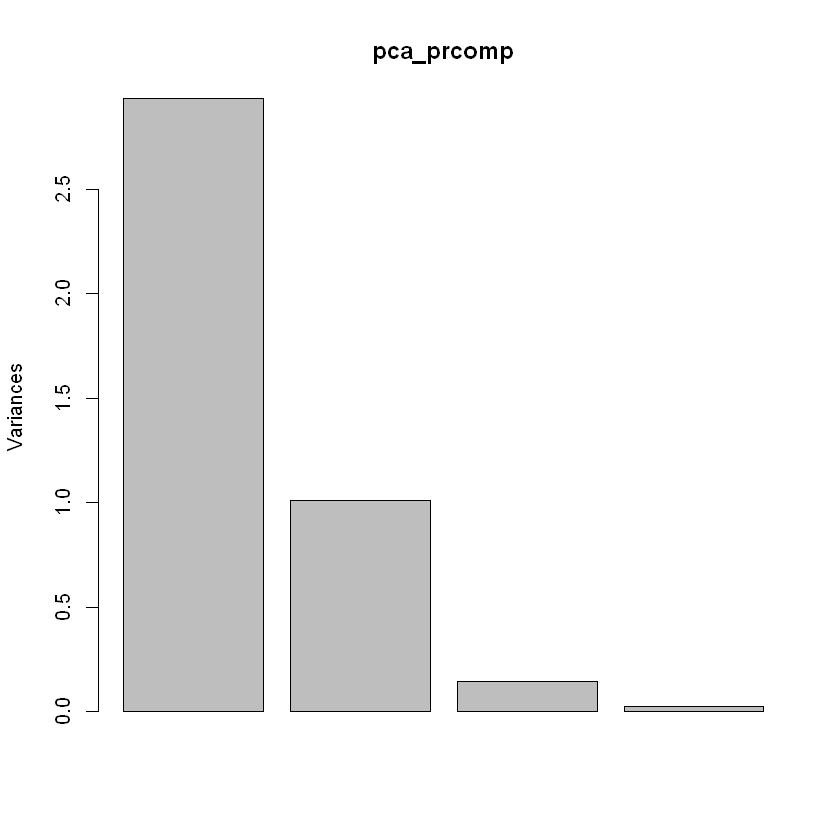

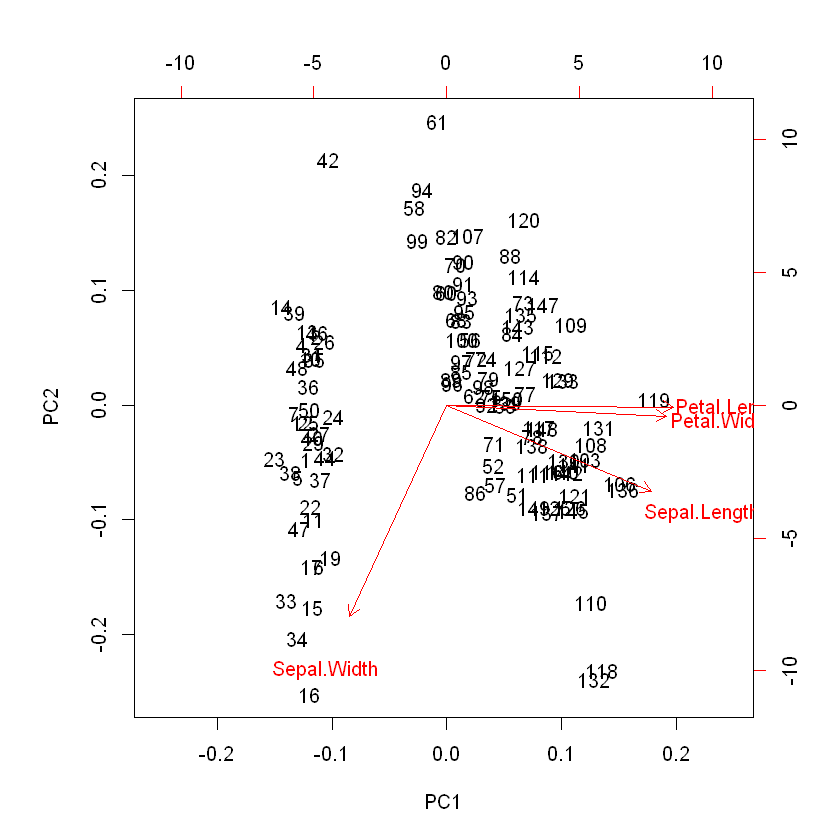

In [14]:
plot(pca_prcomp)
biplot(pca_prcomp)

### Visualizar a Significância dos Componentes

-  O primeiro componente principal tem variância 2.93 (pca_prcomp$sdev[1]^2), bem maior do que a média das variâncias (igual a 1). Além disso, o gráfico da Fig. 4 indica que o número decomponentes a reter é três.

In [15]:
pca_prcomp$sdev[1]^2

[1] 2.934839

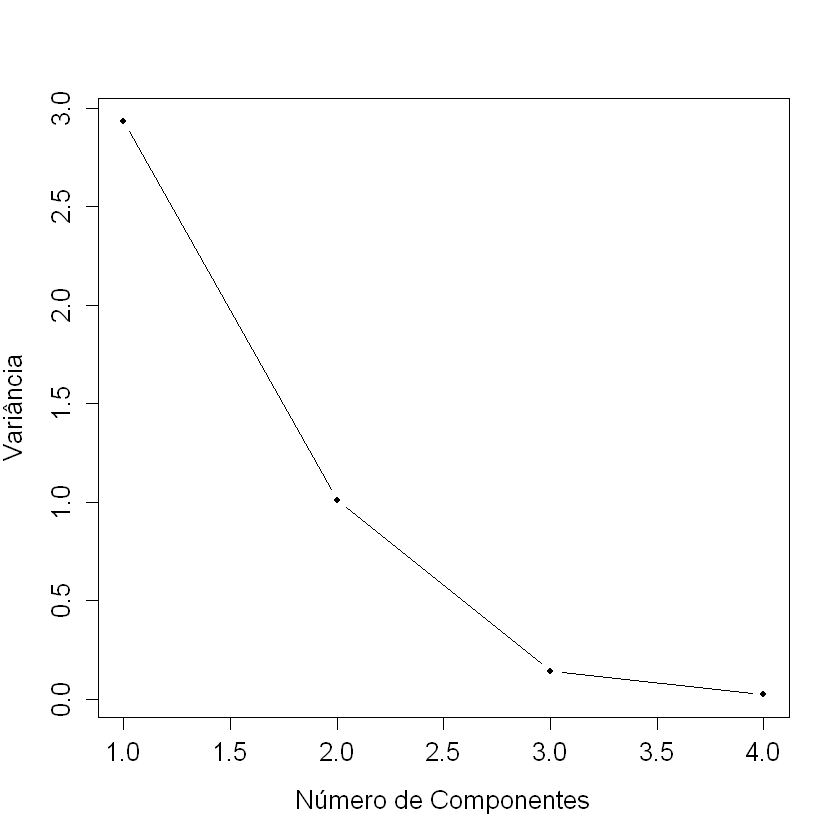

In [16]:
plot(
    1:ncol(treino[,-5]), # Número de Colunas
    pca_prcomp$sdev^2, #Variância dos Dados
    type = "b",
    xlab = "Número de Componentes",
    ylab = "Variância",
    pch = 20,
    cex.axis = 1.3,
    cex.lab = 1.3
)

### Prever os Dados de Teste

- Usar apenas as 3 primeiras componentes, podemos usar o **rank.** e recalcular o PCA 
- Ou pemos apenas especificar as 3 primeiras colunas do PCA

In [17]:
pca_prcomp = prcomp(treino[,-5], rank. = 3)
summary(pca_prcomp)

Importance of first k=3 (out of 4) components:
                          PC1    PC2     PC3
Standard deviation     1.7131 1.0055 0.37606
Proportion of Variance 0.7141 0.2460 0.03441
Cumulative Proportion  0.7141 0.9601 0.99453

In [55]:
pca_prcomp_treino = predict(pca_prcomp, treino)
pca_prcomp_teste = predict(pca_prcomp, teste)

classificador <- naiveBayes(x = pca_prcomp_treino, y = treino[, 5])

previsao = predict(classificador, newdata = pca_prcomp_teste, type = 'raw')

pred = ifelse(previsao[, 1] > 0.5, 'setosa', 0)
pred = ifelse(previsao[, 2] > 0.5, 'versicolor', pred)
pred = ifelse(previsao[, 3] > 0.5, 'virginica', pred)

acuracia = 100 * sum(pred == teste[, 5])/length(teste[, 5])
acuracia

[1] 91.66667

## princomp

In [53]:
pca_princomp = princomp(treino[,-5], cor = T)
summary(pca_princomp)

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4
Standard deviation     1.6969503 0.9796711 0.37209290 0.148832700
Proportion of Variance 0.7199101 0.2399389 0.03461328 0.005537793
Cumulative Proportion  0.7199101 0.9598489 0.99446221 1.000000000

In [56]:
pca_princomp_treino = predict(pca_princomp, treino)
pca_princomp_teste = predict(pca_princomp, teste)

classificador <- naiveBayes(x = pca_princomp_treino, y = treino[, 5])

previsao = predict(classificador, newdata = pca_princomp_teste, type = 'raw')

pred = ifelse(previsao[, 1] > 0.5, 'setosa', 0)
pred = ifelse(previsao[, 2] > 0.5, 'versicolor', pred)
pred = ifelse(previsao[, 3] > 0.5, 'virginica', pred)

acuracia = 100 * sum(pred == teste[, 5])/length(teste[, 5])
acuracia

[1] 83.33333

# LDA - Library MASS

https://www.rdocumentation.org/packages/MASS/versions/7.3-54/topics/lda

- **formula** - Uma fórmula da forma, uu seja, a resposta é o fator de agrupamento e o lado direito especifica os (não-fatores) discriminadores.groups ~ x1 + x2 + …
- **data** - Um quadro de dados opcional, lista ou ambiente a partir do qual as variáveis especificadas são preferencialmente a serem tomadas.formula
- **X** - (necessário se nenhuma fórmula for dada como argumento principal.) uma matriz ou quadro de dados ou Matriz contendo as variáveis explicativas.
- **groupning** - (necessário se nenhum argumento principal de fórmula for dado.) um fator especificando a classe para cada observação.
- **prior** - As probabilidades anteriores de adesão à classe. Se não for especificado, as proporções de classe para o conjunto de treinamento são usadas. Se presente, as probabilidades devem ser especificadas na ordem dos níveis de fator.
- **tol** - Uma tolerância para decidir se uma matriz é singular; rejeitará variáveis e combinações lineares de variáveis unit-variância cuja variância é menor do que .tol^2
- **subset** - Um vetor de índice especificando os casos a serem utilizados na amostra de treinamento. (NOTA: Se dado, este argumento deve ser nomeado.)
- **na.action** - Uma função para especificar a ação a ser tomada se s forem encontrados. A ação padrão é que o procedimento falhe. Uma alternativa é, o que leva à rejeição de casos com valores perdidos em qualquer variável necessária. (NOTA: Se dado, este argumento deve ser nomeado.)NAna.omit
- **method** - "moment" para os estimadores padrão da média e variância, para MLEs, para uso , ou para estimativas robustas com base em uma distribuição \(t\)."mle""mve"cov.mve"t"
- **CV** - Se for verdade, retorna resultados (classes e probabilidades posteriores) para validação cruzada de saída. Observe que se o anterior for estimado, as proporções em todo o conjunto de dados são utilizadas.
- **nu** - graus de liberdade para.method = "t"

Atributos

Se o valor de retorno for uma lista com componentes, a classificação MAP (um fator) e, probabilidades posteriores para as classes.CV = TRUE, Caso contrário, é um objeto de classe contendo os seguintes componentes:"lda"

- **prior** - As probabilidades anteriores utilizadas.
- **means** - O grupo significa.
- **scaling** - Uma matriz que transforma observações em funções discriminatórias, normalizada para que dentro dos grupos a matriz de covariância seja esférica.
- **svd** - Os valores singulares, que dão a razão dos desvios padrão entre entre e dentro do grupo nas variáveis discriminantes lineares. Seus quadrados são as estatísticas canônicas.
- **n** - O número de observações utilizadas.
- **call** - A chamada de função (combinada).

In [21]:
model_lda = lda(Species ~ ., data = treino)
model_lda$scaling

,LD1,LD2
Sepal.Length,0.7539430,0.6324040
Sepal.Width,0.5844503,0.6697283
Petal.Length,-3.9875714,-2.3934774
Petal.Width,-2.0246049,2.2810641


In [22]:
previsao = predict(model_lda, newdata = teste)
acuracia = 100 * sum(previsao$class == teste$Species)/length(teste$Species)
acuracia

[1] 97.22222

# T-SNE

**A principal aplicação do t-SNE é para visualização de grande quantidade de dados, pois pode recuperar clusters bem separados**

Parâmetros

- **x** - matriz; Matriz de dados (cada linha é uma observação, cada coluna é uma variável)
- **...** - Outros argumentos que podem ser passados para Rtsne
- **dims** - Inteiro; Dimensionalidade de saída (padrão: 2)
- **initial_dims** - Inteiro; o número de dimensões que devem ser mantidas na etapa inicial do PCA (padrão: 50)
- **perplexity** - Numérico; Parâmetro de perplexidade (não deve ser maior que 3 * perplexidade < nrow(X) - 1, veja detalhes para interpretação)
- **theta** - Numérico; Troca de velocidade/precisão (aumento para menor precisão), definida para 0.0 para TSNE exata (padrão: 0.5)
- **check_duplicates** - Lógico; Verifica se as duplicatas estão presentes. É melhor garantir que não haja duplicatas presentes e definir essa opção para FALSE, especialmente para grandes conjuntos de dados (padrão: TRUE)
- **Pca** - lógico; Se uma etapa inicial do PCA deve ser executada (padrão: TRUE)
- **partial_pca** - lógico; Se o PCA truncado deve ser usado para calcular os componentes principais (requer o pacote irlba). Isso é mais rápido para grandes matrizes de entrada (padrão: FALSE)
- **max_iter** - inteiro; Número de iterações (padrão: 1000)
- **verbose** - lógico; Se as atualizações de progresso devem ser impressas (padrão: opção global "verbose" ou FALSE se isso não for definido)
- **is_distance** - lógico; Indique se X é uma matriz de distância (experimental, padrão: FALSE)
- **Y_init** - matriz; Localizações iniciais dos objetos. Se NULL, será utilizada a inicialização aleatória (padrão: NULL). Observe que, ao usar isso, o estágio inicial com valores exagerados de perplexidade e um prazo maior de impulso será ignorado.
- **pca_center** - lógico; Os dados devem ser centrados antes da aplicação do PCA? (padrão: TRUE)
- **pca_scale** - lógico; Os dados devem ser dimensionados antes da aplicação do PCA? (padrão: FALSO)
- **normalize** - lógico; Os dados devem ser normalizados internamente antes dos cálculos de distância com ? (padrão: TRUE)
- **stop_lying_iter** - inteiro; Iteração após a qual as perplexidades não são mais exageradas (padrão: 250, exceto quando Y_init é usado, então 0)
- **mom_switch_iter** - inteiro; Iteração após a qual o momento final é usado (padrão: 250, exceto quando Y_init é usado, então 0)
- **ímpeto** - numérico; Momentum usado na primeira parte da otimização (padrão: 0.5)
- **final_momentum** - numérico; Momento usado na parte final da otimização (padrão: 0.8)
- **eta** - numérico; Taxa de aprendizagem (padrão: 200,0)
- **exaggeration_factor** - numérico; Fator de exagero usado para multiplicar a matriz P na primeira parte da otimização (padrão: 12.0)
- **num_threads** - inteiro; Número de threads para usar usando OpenMP, padrão 1. 0 corresponde ao uso de todos os núcleos disponíveis
- **index** - Matriz inteiro; Cada linha contém a identidade dos vizinhos mais próximos para cada observação
- **distância** - Matriz numérica;  Cada row contém a distância para os vizinhos mais próximos em para cada observação index

Atributos

- **Y** - Matriz contendo as novas representações para os objetos
- **n** - Número de objetos
- **origD** - Dimensionalidade original antes do TSNE (somente quando é uma matriz de dados)X
- **perplexity**
- **theta**
- **cust** - O custo para cada objeto após a iteração final
- **itercos** - Os custos totais (KL-divergência) para todos os objetos em cada 50º + a última iteração
- **stop_lying_iter** - Iteração após a qual as perplexidades não são mais exageradas
- **mom_switch_iter** - Iteração após a qual o momento final é usado
- **momentum** - Momento usado na primeira parte da otimização
- **final_momentum** - Momento usado na parte final da otimização
- **eta** - Taxa de aprendizagem
- **exaggeration_factor** - Fator de exagero usado para multiplicar a matriz P na primeira parte da otimização

In [61]:
tsne_treino <- Rtsne(
    treino[, -5],
    pca = FALSE, 
    perplexity=(length(treino[, 5]) -1)/3,
    theta=0.0
)

tsne_teste <- Rtsne(
    teste[, -5],
    pca = FALSE, 
    perplexity= (length(teste[, 5]) - 1)/3,
    theta=0.0
)

In [67]:
classificador <- naiveBayes(x = tsne_treino$Y, y = treino[, 5])

previsao = predict(classificador, newdata = tsne_teste$Y, type = 'raw')

acuracia = 100 * sum(pred == teste[, 5])/length(teste[, 5])
acuracia

[1] 83.33333

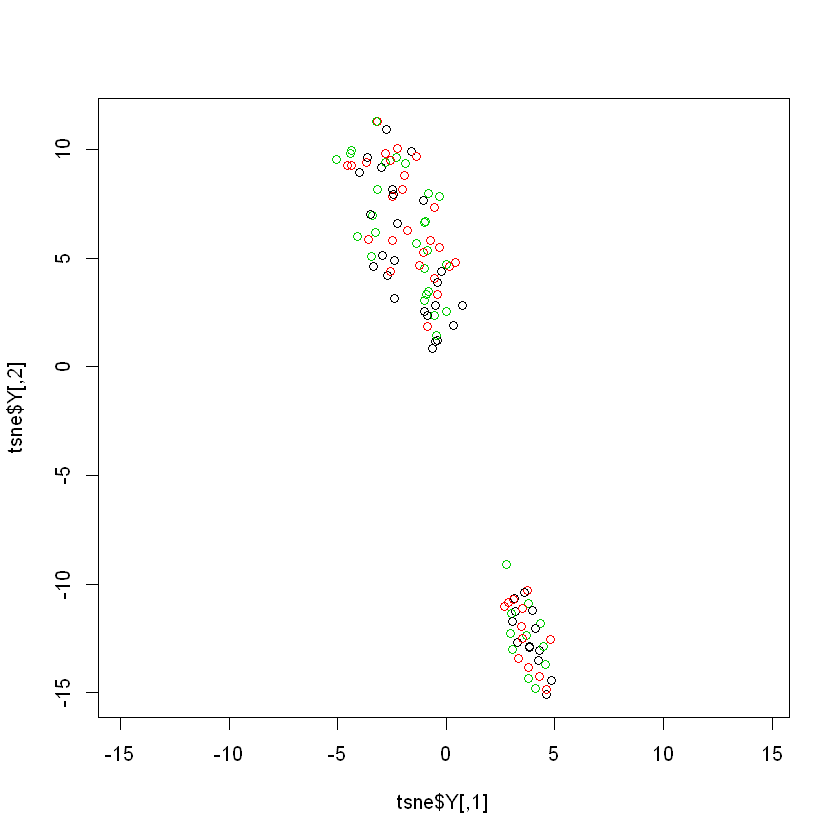

In [68]:
plot(tsne$Y,col=unique(iris$Species), asp=1)